### Criando Gráficos de Candlestick com Matplotlib
![Candlestick Chart](https://i.imgur.com/84LtMlN.png)


![Candlestick](https://www.bussoladoinvestidor.com.br/wp-content/uploads/2019/12/upload_cms_candlestick_Candlestick1.png)

Fonte: https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/

In [ ]:
!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216309   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735245   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261627   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
...               ...  
2023-12-22   37122800  
2023-12-26   28919300  
2023-12-27   48087700  
2023-12-28   34049900  
2023-12-29   42628800  

[250 rows x 6 columns]

In [ ]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']

In [ ]:
dados = dados.rename_axis('Data')
dados

Abertura      Maximo      Minimo  Fechamento  Fech_Ajust  \
Data                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216309   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735245   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261627   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume  
Data                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
...               ...  
2023-12-22   37122800  
2023-12-26   28919300  
2023-12-27   48087700  
2023-12-28   34049900  
2023-12-29   42628800  

[250 rows x 6 columns]

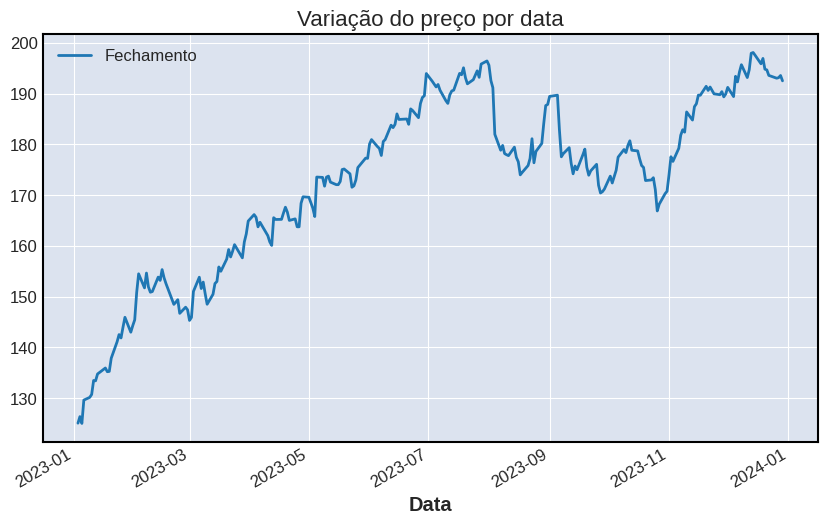

In [ ]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [ ]:
df = dados.head(365).copy()

# Convertendo o índice em uma coluna de data
df['Data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

df

Abertura      Maximo      Minimo  Fechamento  Fech_Ajust  \
Data                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216309   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735245   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261627   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume     Data  
Data                            
2023-01-03  112117500  19360.0  
2023-01-04   89113600  19361.0  
2023-01-05   80962700  19362.0  
2023-01-06   87754700  19363.0  
2023-01-09   70790800  19366.0  
...               ...      ...  
2023-12-22   37122800  19713.0  
2023-12-26   28919300  19717.0  
2023-12-27   48087700  19718.0  
2023-12-28   34049900  19719.0  
2023-12-29   42628800  19720.0  

[250 rows x 7 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [ ]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


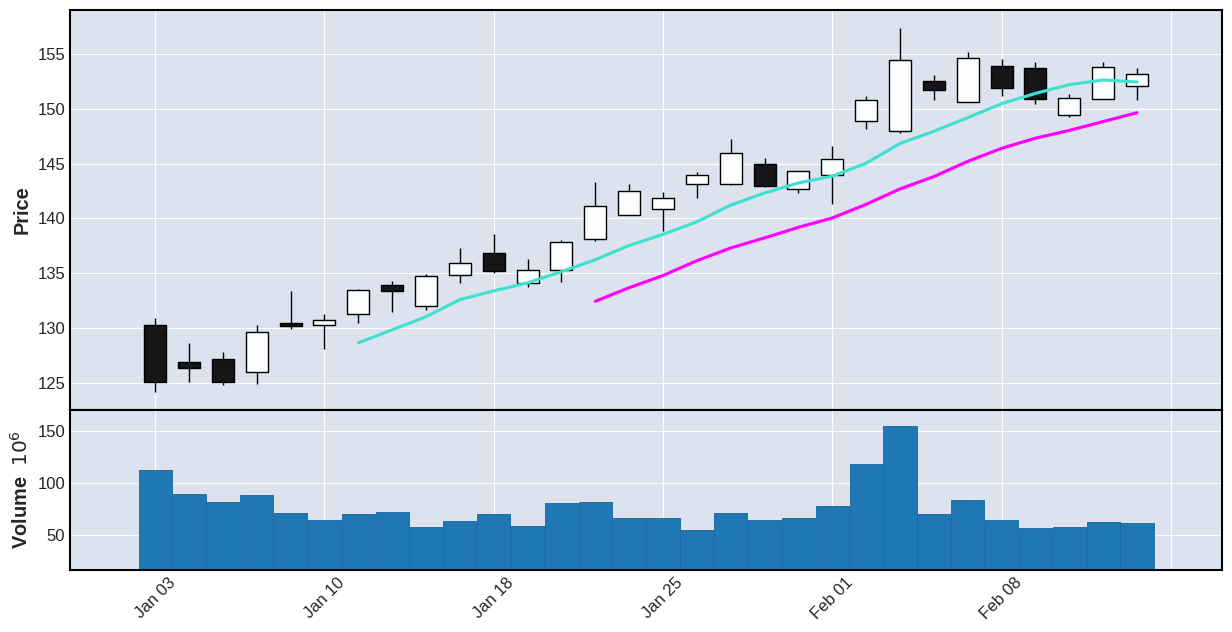

In [ ]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))